## Esercizi con Pandas



In [19]:
import pandas as pd
import random


__Esercizio uno__

Create un DataFrame sulla base di un elenco di almeno 10 clienti forniti dall'utente tramite input e salvatelo in formato csv.
Per ogni cliente verranno forniti:

Numero Cliente, Nome, Cognome, Data di Nascita, Regione di Residenza.

In [20]:

# liste random di nomi cognomi  regioni
nomi = ['Anna', 'Luca', 'Marco', 'Giulia', 'Francesca', 'Davide', 'Sara', 'Giorgio', 'Elisa', 'Paolo']
cognomi = ['Rossi', 'Bianchi', 'Verdi', 'Esposito', 'Russo', 'Ferrari', 'Romano', 'Gallo', 'Costa', 'Fontana']
regioni = ['Lazio', 'Lombardia', 'Campania', 'Sicilia', 'Veneto', 'Toscana', 'Piemonte', 'Puglia']


def ran_date():
    year = random.randint(1980, 2015)
    month = random.randint(1, 12)
    day = random.randint(1, 29)
    return f"{year}-{month}-{day}"

clienti = []

for i in range(1, 21): 
    clienti.append({
        "N. cliente": i,
        "nome": random.choice(nomi),
        "cognome": random.choice(cognomi),
        "nascita": ran_date(),
        "residenza": random.choice(regioni)
    })

# crea il df
df_clienti = pd.DataFrame(clienti)

print(df_clienti.to_string(index=False))

# CSV
df_clienti.to_csv("clienti_random.csv", index=False)


 N. cliente      nome  cognome    nascita residenza
          1 Francesca    Rossi   1999-9-8    Veneto
          2 Francesca    Russo  2012-5-13  Piemonte
          3    Davide Esposito   2011-5-6  Piemonte
          4    Davide    Costa  1981-12-4  Campania
          5    Davide    Russo   2000-6-3   Sicilia
          6      Sara    Verdi  2002-5-13   Sicilia
          7     Paolo  Fontana  2010-5-19  Piemonte
          8   Giorgio    Gallo   2000-4-7  Campania
          9     Marco   Romano 2015-11-11   Sicilia
         10   Giorgio  Fontana  1993-9-17  Campania
         11   Giorgio    Gallo 1995-12-11     Lazio
         12      Sara  Bianchi 1982-12-28   Sicilia
         13     Paolo  Bianchi  2003-10-2 Lombardia
         14    Giulia    Rossi  1996-7-18    Veneto
         15      Sara  Bianchi 2001-10-28     Lazio
         16    Giulia  Fontana   2007-6-7   Toscana
         17      Sara    Verdi  2001-6-21 Lombardia
         18    Davide    Verdi  1993-11-1   Toscana
         19 

__Esercizio Due__

Partendo dal dataframe creato nell'esercizio precedente, aggiungete 3 colonne:

- La prima contiene una X in corrispondenza dei clienti minorenni;

- La seconda contiene una X in corrispondenza dei clienti con età maggiore di 17 anni;

- La terza contiene una X in corrispondenza dei clienti con età maggiore di 20 anni.

In [21]:
import datetime

In [22]:
#leggi file csv
df = pd.read_csv("clienti_random.csv")

#imposta date oggi
today = datetime.datetime.now()
anno_attuale = today.year


# prendi anno e calocla eta
df["anno nascita"] = df["nascita"].str[:4].astype(int)

df["eta"] = anno_attuale - df["anno nascita"]


# aggiungi colonne con papply lambda
df["minorenne"] = df["eta"].apply(lambda x: "X" if x < 18 else " ")
df["maggiore di 17"] = df["eta"].apply(lambda x: "X" if x > 17 else " ")
df["maggiore di 20"] = df["eta"].apply(lambda x: "X" if x > 20 else " ")

print(df[["N. cliente",  "eta", "minorenne", "maggiore di 17", "maggiore di 20"]].to_string(index=False))


 N. cliente  eta minorenne maggiore di 17 maggiore di 20
          1   26                        X              X
          2   13         X                              
          3   14         X                              
          4   44                        X              X
          5   25                        X              X
          6   23                        X              X
          7   15         X                              
          8   25                        X              X
          9   10         X                              
         10   32                        X              X
         11   30                        X              X
         12   43                        X              X
         13   22                        X              X
         14   29                        X              X
         15   24                        X              X
         16   18                        X               
         17   24               

## Installazione librerie funzioni grafiche

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


Libreria Test

In [5]:
import pandas as pd
# Create and print DataFrame
df2 = pd.DataFrame({
'A': ['1', '2', '3'],
'B': ['4', '5', '6'],
'C': ['7', '8', '9']
})
print(df2)

# Print data types of each column in DataFrame
print("\n")
print(df2.dtypes)

# Change column A's values to floats
df2['A'] = df2['A'].astype(float)

# Change column B and C's values to integers
df2 = df2.astype({'B': int, 'C': int})

print("\nConverted:\n")

# Print altered DataFrame
print(df2)
# Print data types of each column in DataFrame
print("\n")
print(df2.dtypes)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


A    object
B    object
C    object
dtype: object

Converted:

     A  B  C
0  1.0  4  7
1  2.0  5  8
2  3.0  6  9


A    float64
B      int32
C      int32
dtype: object


Stampa

<Axes: >

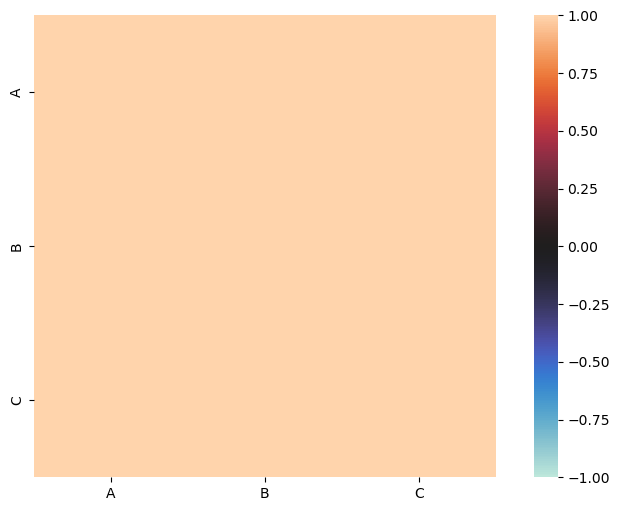

In [6]:

corr = df2.corr()

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
#cmap=sns.diverging_palette(20, 220, n=200),
square=True
)